In [1]:
prob<-function(x,b){
    return(exp(x%*%b)/(1+exp(x%*%b)))
}
l<-function(x,y,b){
    return(t(y)%*%x%*%b-sum(log(1+exp(x%*%b))))
}

In [2]:
NR<-function(N){
    train.X<-matrix(c(rep(1,N),rnorm(2*N)),nrow=N)
    b<-c(0.5,1.2,-1)
    train.Y<-prob(train.X,b)>runif(N)
    train.b<-rep(0,3)
    hist<-train.b
    for (i in 1:200){
        g<-t(train.X)%*%(train.Y-prob(train.X,train.b))
        W<-diag(as.vector(prob(train.X,train.b)*(1-prob(train.X,train.b))))
        h<--t(train.X)%*%W%*%train.X
        k<-1
        while ((l(train.X,train.Y,train.b-k*solve(h)%*%(g))-l(train.X,train.Y,train.b))<k*sum((solve(h)%*%(g))^2)&(k>1e-3)) k<-k/2
        if (max(abs(k*solve(h)%*%(g))<1e-5)) break
        train.b<-train.b-k*solve(h)%*%(g)
        hist<-cbind(hist,train.b)
    }
    return(hist)
}

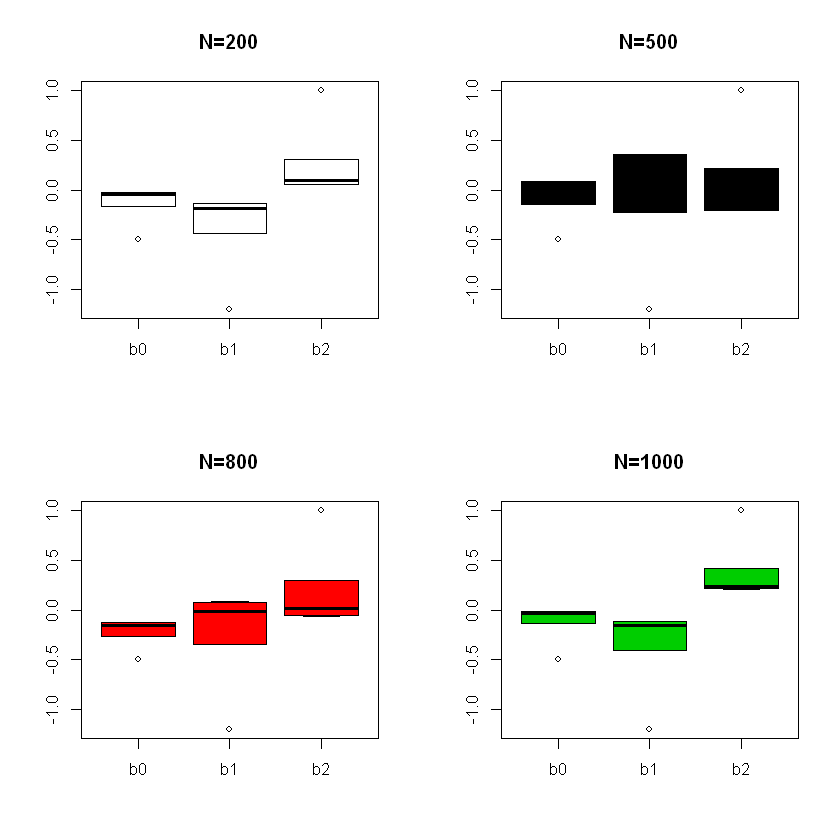

In [3]:
b<-c(0.5,1.2,-1)
par(mfrow=c(2,2))
for (i in c(200,500,800,1000)){
    boxplot(t(NR(i)-b),names=c('b0','b1','b2'),col=i/300)
    title(paste0('N=',as.character(i)))
}